In [ ]:
 #execute this cell, then press 'Restart and clear cell outputs' and execute all cells except this
!pip install -U tensorflow==2.12.0rc0
!pip install -U numpy==1.18.5

  Using cached numpy-1.18.5.zip (5.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install contractions
!pip install vaderSentiment
!pip install sweetviz
!pip install textblob

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import contractions
import sweetviz as sv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import time

#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dir_cs_aware_cleaned_text = '/content/gdrive/MyDrive/RelevanceAnalysis/cs_aware_cleaned_text.csv'

cs_aware_cleaned_text = pd.read_csv(dir_cs_aware_cleaned_text)
print(cs_aware_cleaned_text.shape)

(17792, 4)


In [ ]:
dir_not_cs_aware_cleaned_text = '/content/gdrive/MyDrive/RelevanceAnalysis/not_cs_aware_cleaned_text.csv'

not_cs_aware_cleaned_text = pd.read_csv(dir_not_cs_aware_cleaned_text)
print(not_cs_aware_cleaned_text.shape)

(7020, 6)


In [ ]:
cs_aware_cleaned_text = cs_aware_cleaned_text.drop(['Unnamed: 0'], axis = 1)
not_cs_aware_cleaned_text = not_cs_aware_cleaned_text.drop(['Unnamed: 0'], axis = 1)

In [ ]:
cs_aware_cleaned_text

,full_text,lang,Related
0,non transparent sharing of branch predictor se...,en,1
1,non transparent sharing of branch predictor wi...,en,1
2,hardware debug modes and processor init settin...,en,1
3,sensitive information accessible by physical p...,en,1
4,pan os software provides options to exclude sp...,en,1
...,...,...,...
17787,healthcare and publichealth sector organizatio...,en,1
17788,do not give an attacker the opportunity to tak...,en,1
17789,check out cisagov s redeye it is an interactiv...,en,1
17790,cisagov s known exploited vulnerabilities cata...,en,1


try to cathegorize

In [ ]:
choices = {"malware":"Malware",
           "DoS":"DoS",
           "denial of service":"DoS",
           "ransomware":"ransomware",
           "Zero-day": "Zero-day Vulnerabilities",
           "software update": "Updates",
           "firewall":"Firewall Vulnerabilities",
           "LAN":"Network Vulnerabilities",
           "hardware": "hardware",

          }

In [ ]:
df = cs_aware_cleaned_text
df

,full_text,lang,Related
0,non transparent sharing of branch predictor se...,en,1
1,non transparent sharing of branch predictor wi...,en,1
2,hardware debug modes and processor init settin...,en,1
3,sensitive information accessible by physical p...,en,1
4,pan os software provides options to exclude sp...,en,1
...,...,...,...
17787,healthcare and publichealth sector organizatio...,en,1
17788,do not give an attacker the opportunity to tak...,en,1
17789,check out cisagov s redeye it is an interactiv...,en,1
17790,cisagov s known exploited vulnerabilities cata...,en,1


In [ ]:
count = 0
df["category"] = df["full_text"].str.findall("|".join(choices.keys())).str.join(",").map(choices)
for i in range (0, len(df["category"])):
    if (df["category"][i] == "Firewall Vulnerabilities"):
        count += 1
print(count)

52


categorization ends here

In [ ]:
cs_aware_cleaned_text = cs_aware_cleaned_text.drop(labels=range(0, 11000), axis=0)
cs_aware_cleaned_text

,full_text,lang,Related,category
11000,windows gdi remote code execution vulnerability,en,1,NaN
11001,microsoft defender for endpoint tampering vuln...,en,1,NaN
11002,microsoft edge chromium based elevation of pri...,en,1,NaN
11003,microsoft edge chromium based elevation of pri...,en,1,NaN
11004,allocation of resources without limits or thro...,en,1,NaN
...,...,...,...,...
17787,healthcare and publichealth sector organizatio...,en,1,NaN
17788,do not give an attacker the opportunity to tak...,en,1,NaN
17789,check out cisagov s redeye it is an interactiv...,en,1,NaN
17790,cisagov s known exploited vulnerabilities cata...,en,1,NaN


In [ ]:
# cs_aware_cleaned_text_plot

<Axes: title={'center': 'Percentage of Languages'}, ylabel='lang'>

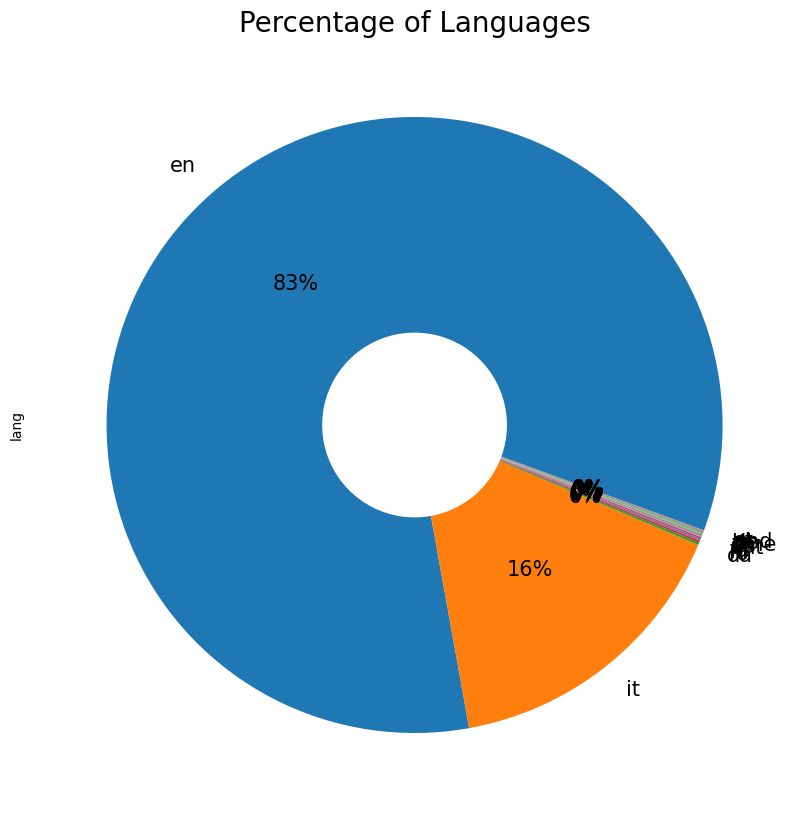

In [ ]:
## check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Languages', fontsize=20)

cs_aware_cleaned_text.lang.value_counts().plot(kind='pie', wedgeprops=dict(width=.7),   autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

In [ ]:
not_cs_aware_cleaned_text

,full_text,lang,Polarity,Sentiment_Type,Related
0,youtube the world design of elden ring,ko,0.000000,NEUTRAL,0
1,rt mezzyali hoeybblessed mahran digger...,en,0.000000,NEUTRAL,0
2,rt jonahjmeyerhoff apply online for our nimh...,en,-0.033333,NEGATIVE,0
3,rt fashionpressnet ...,ja,0.000000,NEUTRAL,0
4,rt yunaussy since you all want to complain ...,en,0.000000,NEUTRAL,0
...,...,...,...,...,...
7015,tohkkis i draw s stick men w or l offer,en,0.000000,NEUTRAL,0
7016,it was in some such fashion that the world spo...,en,0.000000,NEUTRAL,0
7017,goog afternoon guys who wants to support my...,en,0.200000,POSITIVE,0
7018,robinhanson not convenient nor liquid in low ...,en,0.033333,POSITIVE,0


<Axes: title={'center': 'Percentage of Labels'}, ylabel='lang'>

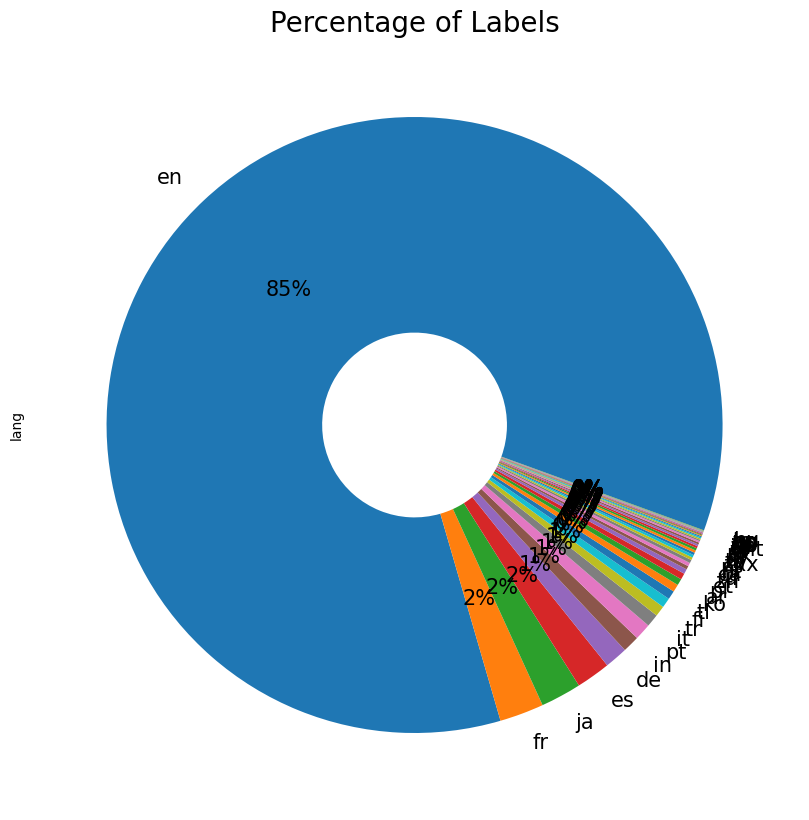

In [ ]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
not_cs_aware_cleaned_text.lang.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

In [ ]:
not_cs_aware_cleaned_text = pd.DataFrame(not_cs_aware_cleaned_text, columns = ['full_text','lang', 'Related'])
cs_aware_data = pd.concat([cs_aware_cleaned_text, not_cs_aware_cleaned_text], ignore_index = True)
cs_aware_data

,full_text,lang,Related,category
0,windows gdi remote code execution vulnerability,en,1,NaN
1,microsoft defender for endpoint tampering vuln...,en,1,NaN
2,microsoft edge chromium based elevation of pri...,en,1,NaN
3,microsoft edge chromium based elevation of pri...,en,1,NaN
4,allocation of resources without limits or thro...,en,1,NaN
...,...,...,...,...
13807,tohkkis i draw s stick men w or l offer,en,0,NaN
13808,it was in some such fashion that the world spo...,en,0,NaN
13809,goog afternoon guys who wants to support my...,en,0,NaN
13810,robinhanson not convenient nor liquid in low ...,en,0,NaN


<Axes: title={'center': 'Percentage of Labels'}, ylabel='lang'>

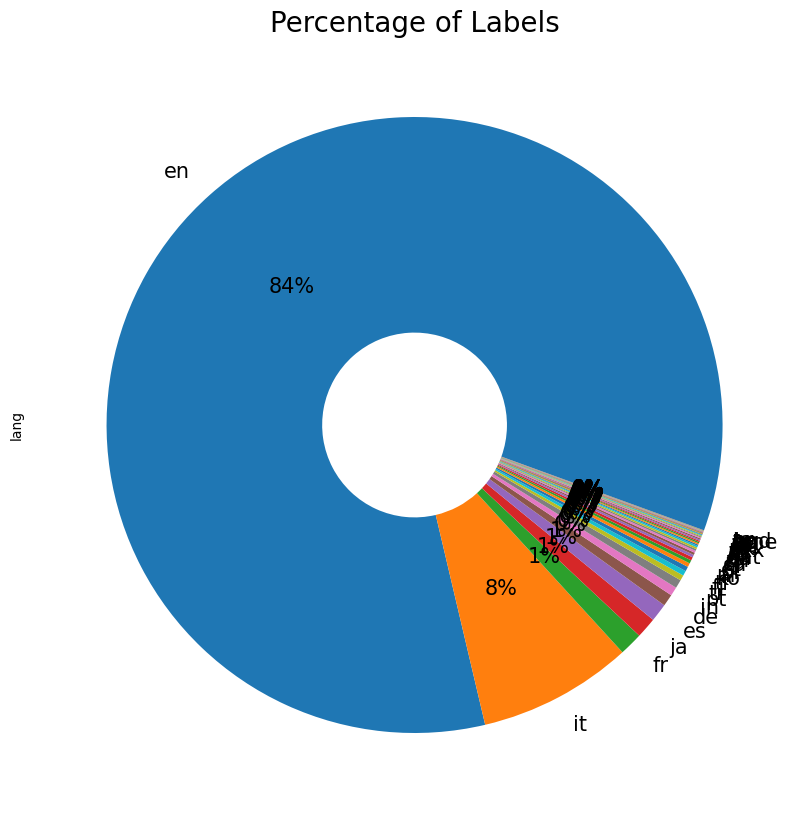

In [ ]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
cs_aware_data.lang.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

tokenize + embeddings

In [ ]:
# pip install --upgrade tensorflow

In [ ]:
!pip install keras-tuner
!pip install --upgrade paramiko cryptography


In [ ]:
import numpy as np
import pandas as pd
import os
import json
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
from sklearn import preprocessing

import nltk # NLP
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

#Tuner
from keras_tuner.tuners import RandomSearch


In [ ]:
# seed initialization
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

<Axes: title={'center': 'Percentage of Labels'}, ylabel='Related'>

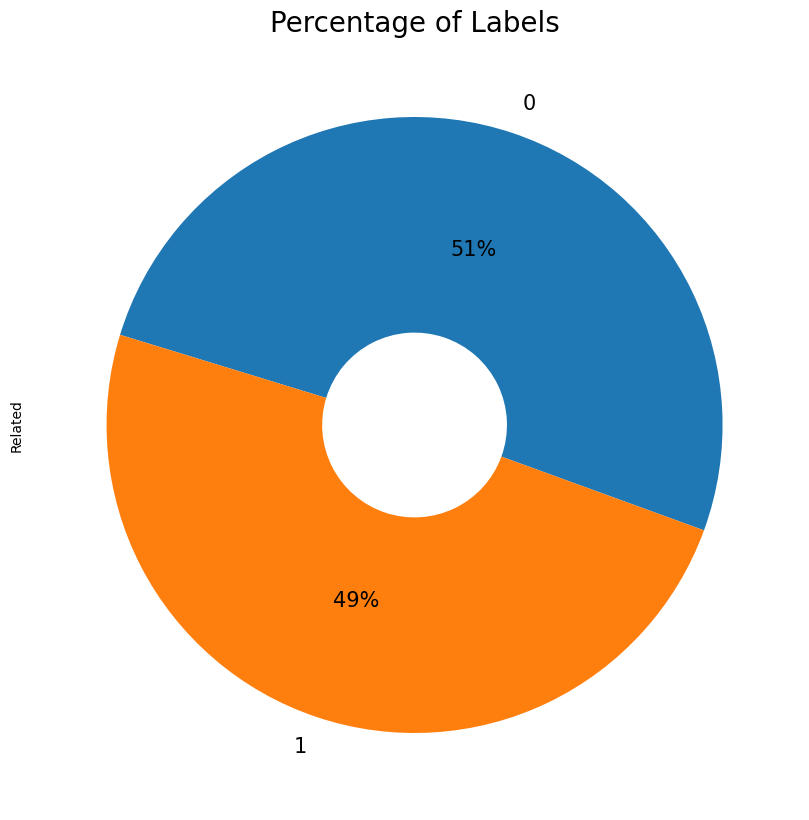

In [ ]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
cs_aware_data.Related.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

In [ ]:
cs_aware_data = cs_aware_data.drop_duplicates(subset=['full_text'])
print(cs_aware_data)
cs_aware_data.to_csv('cs_aware.csv')

                                               full_text lang  Related  \
0        windows gdi remote code execution vulnerability   en        1   
1      microsoft defender for endpoint tampering vuln...   en        1   
2      microsoft edge chromium based elevation of pri...   en        1   
4      allocation of resources without limits or thro...   en        1   
5      system center operations manager open manageme...   en        1   
...                                                  ...  ...      ...   
13807          tohkkis i draw   s stick men w or l offer   en        0   
13808  it was in some such fashion that the world spo...   en        0   
13809  goog afternoon   guys  who wants to support my...   en        0   
13810   robinhanson not convenient nor liquid in low ...   en        0   
13811  this really just paid my rent    chrissypodola...   en        0   

      category  
0          NaN  
1          NaN  
2          NaN  
4          NaN  
5          NaN  
...      

LASER

In [ ]:
!pip install torch==2.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!pip install -q laserembeddings==1.1.2
!pip install -q ftfy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchvision 0.16.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.


In [ ]:
!pip install fastcache
# import fasttext
import ftfy
import html
import laserembeddings
import sys

from fastcache import clru_cache
from laserembeddings import Laser
from typing import List, Union
from urllib.parse import unquote

****LASER Embeddings****
This encodes each of the strings as a LASER embedding (1024 dimentional vector)

In [ ]:
%%bash
# DOCS: https://github.com/facebookresearch/LASER/blob/master/install_models.sh
mkdir -p models/laser/
# for FILE in bilstm.eparl21.2018-11-19.pt eparl21.fcodes eparl21.fvocab bilstm.93langs.2018-12-26.pt 93langs.fcodes 93langs.fvocab; do
for FILE in bilstm.93langs.2018-12-26.pt 93langs.fcodes 93langs.fvocab; do
    wget -cq https://dl.fbaipublicfiles.com/laser/models/$FILE -O models/laser/$FILE
done

In [ ]:
!pip install config
#from src.utils.fasttest_model import language_detect
# from src.utils.punkt_tokenizer import punkt_tokenize_sentences

config = {
    "laser": {
        "base_dir":  "./models/laser",
        "bpe_codes": "./models/laser/93langs.fcodes",
        "bpe_vocab": "./models/laser/93langs.fvocab",
        "encoder":   "./models/laser/bilstm.93langs.2018-12-26.pt",
    }
}

In [ ]:
# Instantiate encoder
# BUG: CUDA GPU memory is exceeded if both laser and labse are loaded together
# @clru_cache(None)
def get_laser_model():
    laser_model = Laser(
        bpe_codes = config['laser']['bpe_codes'],
        bpe_vocab = config['laser']['bpe_vocab'],
        encoder   = config['laser']['encoder'],
        tokenizer_options = None,
        embedding_options = None
    )
    return laser_model

def laser_encode(text: Union[str, List[str]], lang='autodetect', normalize=True) -> np.ndarray:
    """
    Encodes a corpus of text using LASER
    :param text: Large block of text (will be tokenized), or list of pre-tokenized sentences
    :param lang: 2 digit language code (optional autodetect)
    :return:     embedding matrix
    """
    laser_model = get_laser_model()

    if isinstance(text, str):
        # sentences = punkt_tokenize_sentences(text, lang=lang)
        sentences = ['text']

    else:
        sentences = list(text)

    embedding = laser_model.embed_sentences(sentences, lang=lang)

    if normalize:
        embedding = embedding / np.sqrt(np.sum(embedding**2, axis=1)).reshape(-1,1)

    return embedding

THE MODEL

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall

# lb = LabelBinarizer()

train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train_test split: test 30%
X_train, X_test, y_train, y_test = train_test_split(cs_aware_data['full_text'], cs_aware_data['Related'], test_size=0.3, random_state=0)

#test is 10% of the initial dataset, val 20%
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(9363,)
(2676,)
(1338,)


In [ ]:
print('Training text lenght: ', len(X_train))
print('Validation text: ', len(X_val))
print('Testing text: ',len(X_test))

Training text lenght:  9363
Validation text:  2676
Testing text:  1338


In [ ]:
X_train =laser_encode(X_train)
X_val = laser_encode(X_val)
X_test = laser_encode(X_test)

In [ ]:
print('X_train.shape', X_train.shape)
print('Y_train.shape', y_train.shape)

X_train.shape (9363, 1024)
Y_train.shape (9363,)


In [ ]:
X_train

array([[ 3.85401361e-02,  3.69417621e-03, -1.81808800e-03, ...,
         1.47655290e-02,  9.36262868e-03, -2.12931130e-02],
       [ 1.92862712e-02,  2.47358897e-04, -5.88677078e-03, ...,
         4.71904539e-02,  2.88029741e-02,  2.97355149e-02],
       [ 1.86615400e-02,  1.10397115e-04,  5.42925531e-03, ...,
         2.78258342e-02,  3.65625769e-02,  4.84947525e-02],
       ...,
       [ 3.76019487e-03,  1.01642322e-03,  4.11867583e-03, ...,
         2.17920411e-02,  1.53323999e-02,  3.15606557e-02],
       [ 1.32326130e-03, -1.54088630e-04,  5.65368030e-03, ...,
         1.15903625e-02,  4.28754417e-03,  5.14792129e-02],
       [-2.53985869e-03, -1.29687405e-05,  3.31361109e-04, ...,
         3.67443450e-02,  3.08856480e-02,  4.55406457e-02]], dtype=float32)

In [ ]:
y_train

7087     0
8313     0
4267     1
11409    0
9388     0
        ..
13554    0
3459     1
10189    0
11184    0
2908     1
Name: Related, Length: 9363, dtype: int64

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(9363, 1024)
(2676, 1024)
(1338, 1024)


In [ ]:
max_len = 1024


> Neural Network - TF Keras

This inputs a 1024 LASER embedding and outputs a 1 bit classification prediction.

A triangular shaped architecture is used, including Dropout and BatchNorm.

2022/07/06 Updated LASER models with support for over 200 languages

In [ ]:
pip install tensorflow-addons

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0-rc0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you'

In [ ]:
# Build the model

accuracy_metric = tf.keras.metrics.BinaryAccuracy()
precision_metric = Precision()
recall_metric = Recall()
f1_score_metric = tfa.metrics.F1Score(num_classes=1, threshold=0.5)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1024,)),
    tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics =  [ accuracy_metric, precision_metric, recall_metric, f1_score_metric ])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
epochs = 1000
batch_size = 32
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    verbose=1,
                    validation_data=([X_val, y_val]),
                    callbacks=callback)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


293/293 [==============================] - 14s 31ms/step - loss: 0.7232 - binary_accuracy: 0.6185 - precision: 0.6205 - recall: 0.5842 - f1_score: 0.6018 - val_loss: 0.6513 - val_binary_accuracy: 0.5217 - val_precision: 1.0000 - val_recall: 0.0085 - val_f1_score: 0.0169
Epoch 2/1000
293/293 [==============================] - 17s 57ms/step - loss: 0.4789 - binary_accuracy: 0.7711 - precision: 0.7856 - recall: 0.7374 - f1_score: 0.7607 - val_loss: 0.4315 - val_binary_accuracy: 0.8786 - val_precision: 0.9763 - val_recall: 0.7668 - val_f1_score: 0.8590
Epoch 3/1000
293/293 [==============================] - 8s 29ms/step - loss: 0.4041 - binary_accuracy: 0.8174 - precision: 0.8415 - recall: 0.7760 - f1_score: 0.8074 - val_loss: 0.2808 - val_binary_accuracy: 0.9312 - val_precision: 0.9655 - val_recall: 0.8892 - val_f1_score: 0.9258
Epoch 4/1000
293/293 [==============================] - 11s 38ms/step - loss: 0.3575 - binary_accuracy: 0.8539 - precision: 0.8747 - recall: 0.8216 - f1_score: 0.

In [ ]:
model.evaluate(X_test, y_test, verbose =1)


42/42 [==============================] - 0s 4ms/step - loss: 0.0859 - binary_accuracy: 0.9731 - precision: 0.9711 - recall: 0.9711 - f1_score: 0.9711


[0.08589260280132294,
 0.9730941653251648,
 0.971061110496521,
 0.971061110496521,
 array([0.9710611], dtype=float32)]

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'binary_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_binary_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


In [ ]:
    print('Train Accuracy')
    model.evaluate(X_train, y_train)

    print('Test Accuracy')
    model.evaluate(X_test, y_test)

Train Accuracy
293/293 [==============================] - 1s 5ms/step - loss: 0.0165 - binary_accuracy: 0.9985 - precision: 0.9989 - recall: 0.9981 - f1_score: 0.9985
Test Accuracy
42/42 [==============================] - 0s 5ms/step - loss: 0.0859 - binary_accuracy: 0.9731 - precision: 0.9711 - recall: 0.9711 - f1_score: 0.9711


[0.08589260280132294,
 0.9730941653251648,
 0.971061110496521,
 0.971061110496521,
 array([0.9710611], dtype=float32)]

In [ ]:
history.history['binary_accuracy']

[0.6184983253479004,
 0.7711203694343567,
 0.8173662424087524,
 0.853892982006073,
 0.8727971911430359,
 0.8835843205451965,
 0.8950122594833374,
 0.8974687457084656,
 0.9077218770980835,
 0.914664089679718,
 0.921926736831665,
 0.9269465208053589,
 0.9267328977584839,
 0.9328206777572632,
 0.93015056848526,
 0.9354907870292664,
 0.9377336502075195,
 0.9393357038497925,
 0.9449962377548218,
 0.9454234838485718,
 0.9445690512657166,
 0.9421125650405884,
 0.9455302953720093,
 0.9525793194770813,
 0.9480935335159302,
 0.9490547776222229,
 0.952899694442749,
 0.9500160217285156,
 0.9525793194770813,
 0.9562106132507324,
 0.9537541270256042,
 0.9577058553695679,
 0.9573854804039001,
 0.954928994178772,
 0.9602691531181335,
 0.9597351551055908,
 0.9606963396072388,
 0.9594147205352783,
 0.9595215320587158,
 0.9620848298072815,
 0.9602691531181335,
 0.9629392027854919,
 0.9639004468917847,
 0.9647548794746399,
 0.9656093120574951,
 0.9653956890106201,
 0.9635800719261169,
 0.9642208814620972,

In [ ]:
model.save('/content/gdrive/MyDrive/Models/laser2.h5')


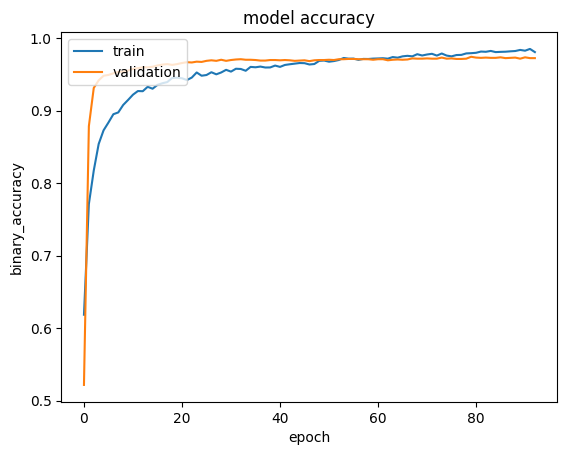

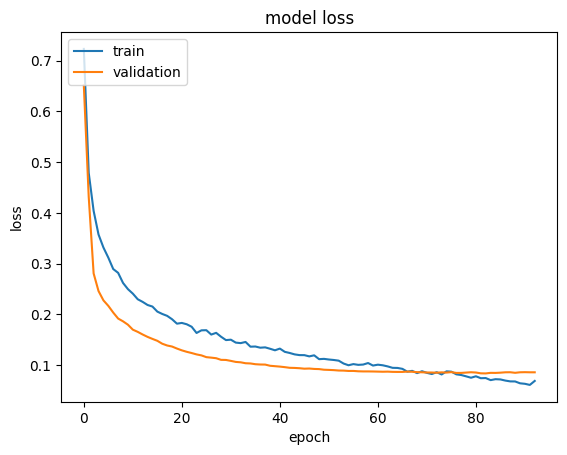

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
prediction = model.predict(X_test)
# show the inputs and predicted outputs
#for i in range(len(X_test)):
print("X=%s, Predicted=%s" % (X_test[0], prediction[0]))

42/42 [==============================] - 0s 3ms/step
X=[ 3.2059439e-03 -1.3680720e-05 -3.6617822e-03 ...  3.5809115e-02
  1.9807667e-02  4.7456179e-02], Predicted=[0.9987995]


In [ ]:
for i in range(len(prediction)):
    if (prediction[i] < 0.5):
        prediction[i] = 0
    else:
        prediction[i] = 1

In [ ]:
matrix = confusion_matrix(y_test, prediction)
print(matrix)
#The diagonal entries are the accuracies of each class
matrix.diagonal()/matrix.sum(axis=1)

[[698  18]
 [ 18 604]]


array([0.97486034, 0.97106109])

In [ ]:
# from mlxtend.evaluate import accuracy_score

# std_acc = accuracy_score(y_test, prediction)
# bin_acc = accuracy_score(y_test, prediction, method='binary', pos_label=1)
# avg_acc = accuracy_score(y_test, prediction, method='average')

# print(f'Standard accuracy: {std_acc*100:.2f}%')
# # print(f'Class 1 accuracy: {bin_acc*100:.2f}%')
# print(f'Average per-class accuracy: {avg_acc*100:.2f}%')

In [ ]:
# # Evaluate the model on the test data using `evaluate`
# print("Evaluate on test data")
# results = model.evaluate(X_test, y_test, batch_size=128)
# print("test loss, test acc:", results)

# Try to Apply the trained model to new Data

In [ ]:
dir_reddit_posts = '/content/gdrive/MyDrive/RelevanceAnalysis/RedditDirectPosts.csv'

reddit_posts_df = pd.read_csv(dir_reddit_posts)
reddit_posts_df = reddit_posts_df.drop(columns=['Unnamed: 0'])

reddit_posts_df.head()

,content
0,I hate attaching an email to a game.. I just s...
1,Email attachments. I'm no malware expert and w...
2,Email attachment size reduced in the email its...
3,Email attachment size reduced in the email its...
4,Email attachment size reduced in the email its...


In [ ]:
test = laser_encode(reddit_posts_df['content'])

In [ ]:
new_predictions = model.predict(test)

# Aggiungi le predizioni al dataframe originale
reddit_posts_df['relevance'] = new_predictions
reddit_posts_df
# Salva i risultati in un nuovo file CSV
#reddit_posts_df.to_csv('risultati_predizione.csv', index=False)

160/160 [==============================] - 1s 3ms/step


,content,relevance
0,I hate attaching an email to a game.. I just s...,0.858569
1,Email attachments. I'm no malware expert and w...,0.945505
2,Email attachment size reduced in the email its...,0.992005
3,Email attachment size reduced in the email its...,0.991887
4,Email attachment size reduced in the email its...,0.992005
...,...,...
5084,She is a goblin masquerading as a dog..,0.198844
5085,"""Race vs. Class"" is a Tactical Question Masque...",0.642553
5086,So when will the masquerade completely collaps...,0.523354
5087,Infomercials Masquerading as Content. This is ...,0.053826


In [ ]:
for i in range(len(new_predictions)):
    if (new_predictions[i] < 0.5):
        new_predictions[i] = 0
    else:
        new_predictions[i] = 1

In [ ]:
reddit_posts_df['RELEVANCE'] = new_predictions
reddit_posts_df

,content,relevance,RELEVANCE
0,I hate attaching an email to a game.. I just s...,0.858569,1.0
1,Email attachments. I'm no malware expert and w...,0.945505,1.0
2,Email attachment size reduced in the email its...,0.992005,1.0
3,Email attachment size reduced in the email its...,0.991887,1.0
4,Email attachment size reduced in the email its...,0.992005,1.0
...,...,...,...
5084,She is a goblin masquerading as a dog..,0.198844,0.0
5085,"""Race vs. Class"" is a Tactical Question Masque...",0.642553,1.0
5086,So when will the masquerade completely collaps...,0.523354,1.0
5087,Infomercials Masquerading as Content. This is ...,0.053826,0.0


In [ ]:
neg = len(reddit_posts_df[reddit_posts_df.RELEVANCE == 0.0])
pos = len(reddit_posts_df[reddit_posts_df.RELEVANCE == 1.0])

ratio = pos / ( neg + pos )

print(f'Relevance Ratio: {ratio}')

Relevance Ratio: 0.7072116329337788


In [ ]:
reddit_posts_df['Checked'] = 0
reddit_posts_df['Manual Evaluation'] = 0


In [ ]:
reddit_posts_df = reddit_posts_df.sample(frac=1).reset_index(drop=True)
reddit_posts_df

,content,relevance,RELEVANCE,Checked,Manual Evaluation
0,How are you detecting compromised network devi...,0.978260,1.0,0,0
1,New iPhone zero-click attack delivered via net...,0.997473,1.0,0,0
2,"how to apply VLOOKUP using PowerShell. HI All,...",0.027649,0.0,0,0
3,Rtx3060 not recognized after AIO failed and ov...,0.942257,1.0,0,0
4,Where to execute a long running script. Hi all...,0.693048,1.0,0,0
...,...,...,...,...,...
5084,"MOVEit Transfer CVE-2023-34362 Deep Dive, Indi...",0.887615,1.0,0,0
5085,"I have created a horror, a monstrosity, I have...",0.915939,1.0,0,0
5086,AWS - Multiple VPCs - Connect VPC Direct Conne...,0.968098,1.0,0,0
5087,Avast Premium botnet:blacklist warning. \nDisc...,0.935653,1.0,0,0


In [ ]:
reddit_posts_df.to_csv('/content/gdrive/MyDrive/RelevanceAnalysis/RedditDirectPosts_analyzed.csv')

# Relevance Classifier model to Reddit posts obtained through an API keywords research

In [ ]:
dir_reddit_f_posts = '/content/gdrive/MyDrive/RelevanceAnalysis/RedditFilteredPosts.csv'

reddit_posts_f_df = pd.read_csv(dir_reddit_f_posts)
reddit_posts_f_df = reddit_posts_f_df.drop(columns=['Unnamed: 0'])

reddit_posts_f_df.head()

,id,content,created_utc,subreddit,author,keyword,keyword type
0,108347,"QR Codes Phishing Emails. Hello,\n\nLately, o...",2023-09-29,cybersecurity,t3_16uva85,email link,delivery method
1,113565,Are you blocking HTML file attachments?. On 3 ...,2023-09-25,cybersecurity,t3_16s166y,email attachment,delivery method
2,115241,Wells Fargo phishing email. I received an emai...,2023-09-24,Scams,t3_16r076f,email link,delivery method
3,117786,I got a Wizzair email and it makes no sense. &...,2023-09-22,Scams,t3_16peenr,email link,delivery method
4,119600,can someone help me figure this out??. I'm not...,2023-09-21,techsupport,t3_16odh4o,email link,delivery method


In [ ]:
test = laser_encode(reddit_posts_f_df['content'])

In [ ]:
new_predictions = model.predict(test)

# Aggiungi le predizioni al dataframe originale
reddit_posts_f_df['relevance'] = new_predictions
reddit_posts_f_df
# Salva i risultati in un nuovo file CSV
#reddit_posts_df.to_csv('risultati_predizione.csv', index=False)

41/41 [==============================] - 0s 6ms/step


,id,content,created_utc,subreddit,author,keyword,keyword type,relevance
0,108347,"QR Codes Phishing Emails. Hello,\n\nLately, o...",2023-09-29,cybersecurity,t3_16uva85,email link,delivery method,0.994446
1,113565,Are you blocking HTML file attachments?. On 3 ...,2023-09-25,cybersecurity,t3_16s166y,email attachment,delivery method,0.997213
2,115241,Wells Fargo phishing email. I received an emai...,2023-09-24,Scams,t3_16r076f,email link,delivery method,0.963080
3,117786,I got a Wizzair email and it makes no sense. &...,2023-09-22,Scams,t3_16peenr,email link,delivery method,0.987559
4,119600,can someone help me figure this out??. I'm not...,2023-09-21,techsupport,t3_16odh4o,email link,delivery method,0.911383
...,...,...,...,...,...,...,...,...
1287,164148,Frustrated with a new Pixel 7 (barely 3 days o...,2023-08-14,AndroidQuestions,t3_15r1m7e,550,attack,0.818646
1288,164708,"Low gpu usage during gaming. Hi, I have recent...",2023-08-14,techsupport,t3_15qkja6,550,attack,0.367145
1289,166442,Is my 550 psu enough for the new RTX 4070?. Cu...,2023-08-11,nvidia,t3_15ol63c,550,attack,0.578920
1290,168507,A VPN system that I can use to mesh-connect my...,2023-08-09,selfhosted,t3_15moogg,masquerade,attack,0.743855


In [ ]:
for i in range(len(new_predictions)):
    if (new_predictions[i] < 0.5):
        new_predictions[i] = 0
    else:
        new_predictions[i] = 1

In [ ]:
reddit_posts_f_df['RELEVANCE'] = new_predictions
reddit_posts_f_df

,id,content,created_utc,subreddit,author,keyword,keyword type,relevance,RELEVANCE
0,108347,"QR Codes Phishing Emails. Hello,\n\nLately, o...",2023-09-29,cybersecurity,t3_16uva85,email link,delivery method,0.994446,1.0
1,113565,Are you blocking HTML file attachments?. On 3 ...,2023-09-25,cybersecurity,t3_16s166y,email attachment,delivery method,0.997213,1.0
2,115241,Wells Fargo phishing email. I received an emai...,2023-09-24,Scams,t3_16r076f,email link,delivery method,0.963080,1.0
3,117786,I got a Wizzair email and it makes no sense. &...,2023-09-22,Scams,t3_16peenr,email link,delivery method,0.987559,1.0
4,119600,can someone help me figure this out??. I'm not...,2023-09-21,techsupport,t3_16odh4o,email link,delivery method,0.911383,1.0
...,...,...,...,...,...,...,...,...,...
1287,164148,Frustrated with a new Pixel 7 (barely 3 days o...,2023-08-14,AndroidQuestions,t3_15r1m7e,550,attack,0.818646,1.0
1288,164708,"Low gpu usage during gaming. Hi, I have recent...",2023-08-14,techsupport,t3_15qkja6,550,attack,0.367145,0.0
1289,166442,Is my 550 psu enough for the new RTX 4070?. Cu...,2023-08-11,nvidia,t3_15ol63c,550,attack,0.578920,1.0
1290,168507,A VPN system that I can use to mesh-connect my...,2023-08-09,selfhosted,t3_15moogg,masquerade,attack,0.743855,1.0


In [ ]:
neg = len(reddit_posts_f_df[reddit_posts_f_df.RELEVANCE == 0.0])
pos = len(reddit_posts_f_df[reddit_posts_f_df.RELEVANCE == 1.0])

ratio = pos / ( neg + pos )

print(f'Relevance Ratio: {ratio}')

Relevance Ratio: 0.901702786377709


In [ ]:
reddit_posts_f_df['Checked'] = 0
reddit_posts_f_df['Manual Evaluation'] = 0


In [ ]:
reddit_posts_f_df = reddit_posts_f_df.sample(frac=1).reset_index(drop=True)

In [ ]:
reddit_posts_f_df.to_csv('/content/gdrive/MyDrive/RelevanceAnalysis/RedditFilteredPosts_analyzed.csv')

# Unchecked Reddit posts

In [ ]:
dir_reddit_f_posts = '/content/gdrive/MyDrive/RelevanceAnalysis/UnbalancedModel_BalancedModel - RedditPosts_analyzed.csv'

reddit_posts_f_df = pd.read_csv(dir_reddit_f_posts)
reddit_posts_f_df = reddit_posts_f_df.drop(columns=['Unnamed: 0'])

reddit_posts_f_df.head()

,full_text,Related,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,Checked,Manual Evaluation,relvance balanced model,RELEVANCE _ BALANCED MODEL
0,Writing a public library and supporting depend...,0,0.013740,0.0,0,0,0.019742,0.0
1,The Browser Company is hiring Software Enginee...,0,0.084986,0.0,0,0,0.020470,0.0
2,"Can’t access bios, safe mode, or windows after...",0,0.013634,0.0,0,0,0.068237,0.0
3,Can't connect my DNS to domain. I have being t...,0,0.002364,0.0,0,0,0.029947,0.0
4,net/http viarables in URL paths?. I am slowly ...,0,0.008666,0.0,0,0,0.055609,0.0


In [ ]:
test = laser_encode(reddit_posts_f_df['full_text'])

In [ ]:
new_predictions = model.predict(test)

# Aggiungi le predizioni al dataframe originale
reddit_posts_f_df['relevance'] = new_predictions
reddit_posts_f_df
# Salva i risultati in un nuovo file CSV
#reddit_posts_df.to_csv('risultati_predizione.csv', index=False)

137/137 [==============================] - 0s 3ms/step


,full_text,Related,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,Checked,Manual Evaluation,relvance balanced model,RELEVANCE _ BALANCED MODEL,relevance
0,Writing a public library and supporting depend...,0,0.013740,0.0,0,0,0.019742,0.0,0.930313
1,The Browser Company is hiring Software Enginee...,0,0.084986,0.0,0,0,0.020470,0.0,0.976363
2,"Can’t access bios, safe mode, or windows after...",0,0.013634,0.0,0,0,0.068237,0.0,0.916577
3,Can't connect my DNS to domain. I have being t...,0,0.002364,0.0,0,0,0.029947,0.0,0.923180
4,net/http viarables in URL paths?. I am slowly ...,0,0.008666,0.0,0,0,0.055609,0.0,0.621103
...,...,...,...,...,...,...,...,...,...
4362,New free mining network. Successfully withdraw...,0,0.013942,0.0,0,0,0.036542,0.0,0.942756
4363,Friend of mine does not good stuff and I need ...,0,0.004978,0.0,0,0,0.063273,0.0,0.176327
4364,Dream Machine Threat Detection and Firewall do...,0,0.938570,1.0,0,0,0.910940,1.0,0.988682
4365,"Soldiers of Company I, 3rd Battalion, 16th Inf...",0,0.060485,0.0,0,0,0.017290,0.0,0.838710


In [ ]:
for i in range(len(new_predictions)):
    if (new_predictions[i] < 0.5):
        new_predictions[i] = 0
    else:
        new_predictions[i] = 1

In [ ]:
reddit_posts_f_df['RELEVANCE NIST MODEL'] = new_predictions
reddit_posts_f_df

,full_text,Related,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,Checked,Manual Evaluation,relvance balanced model,RELEVANCE _ BALANCED MODEL,relevance,RELEVANCE NIST MODEL
0,Writing a public library and supporting depend...,0,0.013740,0.0,0,0,0.019742,0.0,0.930313,1.0
1,The Browser Company is hiring Software Enginee...,0,0.084986,0.0,0,0,0.020470,0.0,0.976363,1.0
2,"Can’t access bios, safe mode, or windows after...",0,0.013634,0.0,0,0,0.068237,0.0,0.916577,1.0
3,Can't connect my DNS to domain. I have being t...,0,0.002364,0.0,0,0,0.029947,0.0,0.923180,1.0
4,net/http viarables in URL paths?. I am slowly ...,0,0.008666,0.0,0,0,0.055609,0.0,0.621103,1.0
...,...,...,...,...,...,...,...,...,...,...
4362,New free mining network. Successfully withdraw...,0,0.013942,0.0,0,0,0.036542,0.0,0.942756,1.0
4363,Friend of mine does not good stuff and I need ...,0,0.004978,0.0,0,0,0.063273,0.0,0.176327,0.0
4364,Dream Machine Threat Detection and Firewall do...,0,0.938570,1.0,0,0,0.910940,1.0,0.988682,1.0
4365,"Soldiers of Company I, 3rd Battalion, 16th Inf...",0,0.060485,0.0,0,0,0.017290,0.0,0.838710,1.0


In [ ]:
neg = len(reddit_posts_f_df[reddit_posts_f_df['RELEVANCE NIST MODEL'] == 0.0])
pos = len(reddit_posts_f_df[reddit_posts_f_df['RELEVANCE NIST MODEL'] == 1.0])

ratio = pos / ( neg + pos )

print(f'Relevance Ratio: {ratio}')

Relevance Ratio: 0.7192580719029081


In [ ]:
reddit_posts_f_df['Checked'] = 0
reddit_posts_f_df['Manual Evaluation'] = 0


In [ ]:
reddit_posts_f_df = reddit_posts_f_df.sample(frac=1).reset_index(drop=True)

In [ ]:
reddit_posts_f_df.to_csv('/content/gdrive/MyDrive/RelevanceAnalysis/GlobalModelsEvaualtion_RedditPosts.csv')